Import libraries required

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #to adjust the configuration of the plots


Read the dataset

In [2]:
movie_df_raw = pd.read_csv(r'P:\Codes\Projects\Python\Movie Industry\Dataset\movies.csv')

Explore the data

In [3]:
# movie_df_raw.shape  # check out the dimension of the dataset
# movie_df_raw.dtypes  # look at the data types for each column
# movie_df_raw.tail()  # read the last five rows
# movie_df_raw.columns.values  # return an array of column names
# movie_df_raw.columns.values.tolist() # return a list of column names

movie_df_raw.head()  # read the first five rows

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Check for missing data

In [4]:
#movie_df_raw.isnull() # checking missing values
#movie_df_raw.notnull() # checking non-missing values
#movie_df_raw.isnull().values.any() # only want to know if there are any missing values
movie_df_raw.isnull().sum()  # knowling number of missing values for each variable
#movie_df_raw.isnull().sum().sum()  # knowing how many missing values in the data

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Drop the rows with NULL values

In [5]:
movie_df = movie_df_raw.dropna(axis = 0)
movie_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [6]:
#check the datatype of the columns
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
#extract year from released

movie_df["corrected_year"] = movie_df['released'].str.extract(pat = '([0-9]{4})').astype('int')

movie_df[movie_df['year'] != movie_df['corrected_year']]['name']


C:\Users\Kopla_Jr\AppData\Local\Temp/ipykernel_17260/2118569426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df["corrected_year"] = movie_df['released'].str.extract(pat = '([0-9]{4})').astype('int')


8                            Superman II
11                The Gods Must Be Crazy
21                         Heaven's Gate
33      Cattle Annie and Little Britches
96                         The Evil Dead
                      ...               
7427                        Stan & Ollie
7432            Dragon Ball Super: Broly
7462                                1917
7525                 Weathering with You
7604                              Mine 9
Name: name, Length: 708, dtype: object

In [8]:
#Change the values of year with corrected year

movie_df['year'] = movie_df["corrected_year"]
movie_df[movie_df['year'] != movie_df['corrected_year']]['name']
movie_df = movie_df.drop(['corrected_year'], axis = 1)
movie_df.head()

C:\Users\Kopla_Jr\AppData\Local\Temp/ipykernel_17260/781100582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['year'] = movie_df["corrected_year"]


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Change the datatypes of columns

In [9]:
movie_df = movie_df.astype({"budget":"int64", "gross":"int64", "votes":"int64","year":"int64"})
movie_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#Sort the movies on gross amount

pd.set_option('display.max_rows', None) 

movie_df = movie_df.sort_values(by=['gross'], inplace=False, ascending=False)

Check for Duplicates

In [11]:
#find the number of duplicate rows in the dataframe
movie_df.duplicated().sum()

#if any duplicates are present run the below code
#   movie_df.drop_duplicates()

0

Checking for correlation

In [12]:
# check if
    #genre has high correlation
    #director has high correlation
    #writer has high correlation
    #star has high correlation
    #country has high correlation
    #budget has high correlation
    #company has high correlation
# with gross


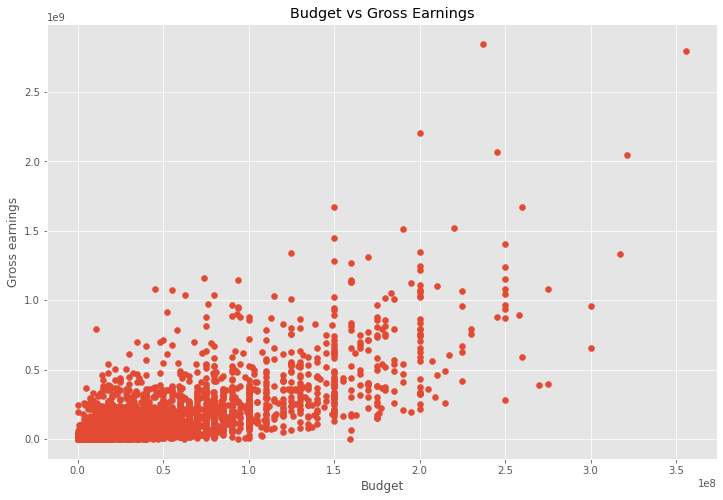

In [13]:
# scatter plot to check budget vs gross

plt.scatter(x = movie_df['budget'], y = movie_df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

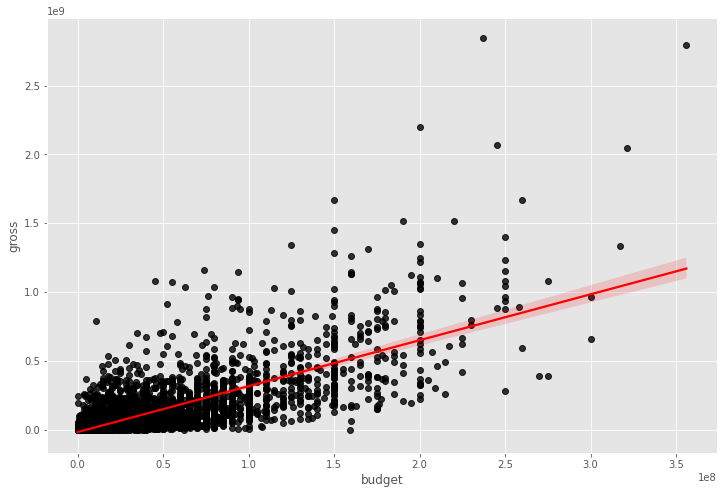

In [14]:
#budget vs gross correlation using seaborn
sns.regplot(x = 'budget', y = 'gross', data = movie_df, scatter_kws = {'color' : 'black'}, line_kws = {'color' : 'red'})

In [15]:
#Check the correlation table
correlation_matrix = movie_df.corr(method='pearson') # Pearson, Kendall, Spearman

# High correlation between budget and gross


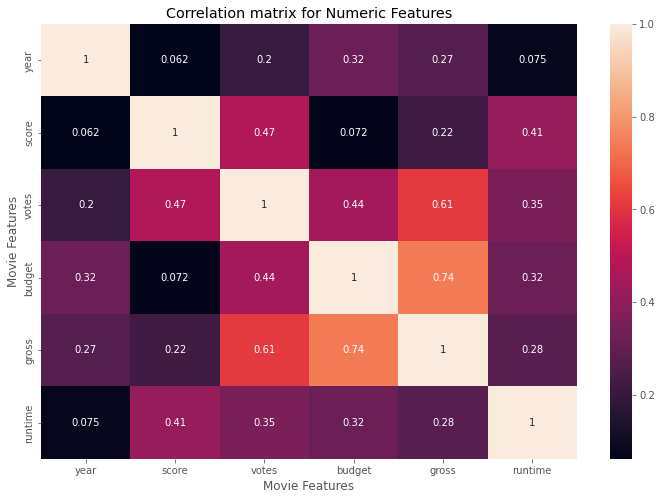

In [16]:
#Seaborn heatmap for the correlation matrix

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [17]:
#Find whether any other feature corresponds to high correlation with gross

# Numerize the object columns

movie_df_numerized = movie_df.copy()

for col in movie_df_numerized.columns:
    if(movie_df_numerized[col].dtype == 'object'):
        movie_df_numerized[col] = movie_df_numerized[col].astype('category')
        movie_df_numerized[col] = movie_df_numerized[col].cat.codes

movie_df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
5445   386       5      0  2009       527    7.8  1100000       785    1263   
7445   388       5      0  2019       137    8.4   903000       105     513   
3045  4909       5      6  1997       534    7.8  1100000       785    1263   
6663  3643       5      0  2015       529    7.8   876000       768    1806   
7244   389       5      0  2018       145    8.4   897000       105     513   
7480  4388       4      2  2019      1126    6.9   222000      1012    1361   
6653  2117       5      0  2015      1303    7.0   593000       335    2523   
6043  3878       5      0  2012      1899    8.0  1300000      1060    1646   
6646  1541       5      0  2015       165    7.1   370000       809     481   
7494  1530       4      2  2019      2053    6.8   148000       277    1383   
6644   387       5      0  2015      1712    7.3   777000      1060    1646   
7247   567       5      0  2018       723    7.3   661000      1716    2687   
5845  1731       5      1  2011      1092    8.1   790000       452    2862   
7075  3644       5      0  2017       500    7.0   581000      1589    2487   
7271  2118       5      0  2018      1384    6.2   277000       764     777   
6262  1529       4      2  2013      2082    7.4   585000       277    1383   
7072   477       4      7  2017      1561    7.1   283000       155    2822   
7281  1966       4      2  2018      1325    7.6   263000       193     327   
7055  4119       5      0  2017        45    6.6   214000       567    1013   
6244  2014       5      0  2013      1881    7.1   779000      1767     837   
6688  2545       4      2  2015      1050    6.4   218000      1144     362   
6846   750       5      0  2016      1910    7.8   694000       105     513   
7250   343       5      0  2018       565    6.9   404000       809     699   
4245  4407       5      0  2003       516    8.9  1700000      1520    1238   
7458  3595       5      0  2019      1136    7.5   359000      1019     479   
7456   755       5      0  2019      1697    6.8   478000        96     182   
5878  4950       5      0  2011      1442    6.2   390000      1302     886   
6059  3498       5      0  2012      2148    7.7   642000      1732    2221   
6494  4949       5      0  2014      1424    5.6   302000      1302     886   
2448  4388       1      2  1994      1394    8.5   970000      1685    1206   
6047  4048       5      0  2012      1144    8.4  1600000       317    1606   
7463  3640       5      0  2019       553    6.5   394000       768     489   
7450  2091       6      5  2019      2321    8.4  1000000      1937    2998   
7488  4936       1      2  2019      1372    7.7   217000      1052    1525   
5685  4935       1      2  2010      1345    8.2   776000      1162    1525   
4852  2985       5      0  2006      1255    7.3   668000       674    2927   
6869  3260       5      0  2016       509    7.8   572000       615     492   
7481   206       4      1  2019      1837    6.9   239000       705    1468   
5860  2988       5      0  2011      1803    6.6   492000      1635    2927   
7140  1102       4      2  2017      1464    6.3   119000      1144     524   
2245  2115       5      0  1993      1292    8.1   894000      1859    2070   
6908  1411       4      2  2016      1339    7.3   250000        81     153   
3451  3637       4      0  1999      1778    6.5   748000       653    1046   
5667   215       4      1  2010      1679    6.4   392000      1918    1849   
6863  5329       4      2  2016      1673    8.0   450000       239     390   
6045  4240       5      1  2012       492    7.8   773000      1520     967   
3843  1736       4      1  2001      1987    7.6   685000       280    1236   
5243  4047       5      0  2008      1116    9.0  2400000       317    1606   
6311  1101       4      2  2013      1218    7.3   377000      1556     524   
6905  4322       4      1  2016        53    7.4   26400

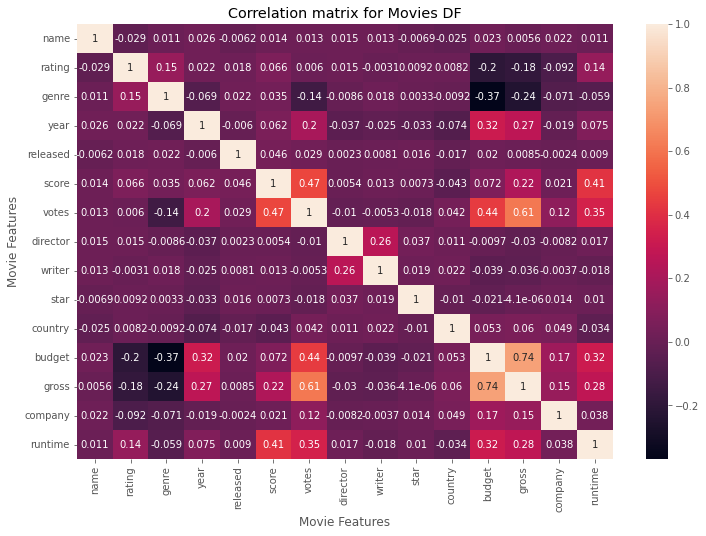

In [18]:
correlation_matrix_numerized = movie_df_numerized.corr(method='pearson')

#Seaborn heatmap of all the columns

sns.heatmap(correlation_matrix_numerized, annot=True)

plt.title('Correlation matrix for Movies DF')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [19]:
corr_mat_num_values = movie_df_numerized.corr()

corr_pair = corr_mat_num_values.unstack()
corr_pair

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.014450
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.005639
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.022021
          released    0.018083
          score       0.065983
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.181906
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [20]:
sorted_corr_pair =corr_pair.sort_values()
high_corr_pair = sorted_corr_pair[(sorted_corr_pair)>0.5]

In [21]:
high_corr_pair

votes     gross       0.614751
gross     votes       0.614751
          budget      0.740247
budget    gross       0.740247
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Budget has the highest correlation with the gross earnings